# WisardPkg: Uma Implementação da família de Modelos WiSARD

## 1. Introdução

`wisardpkg` é uma biblioteca que implementa o algorimo WiSARD original e também múltiplos algoritmos variantes que foram propostos mais recentemente. É inteiramente implementada em C++, mas possui um *wrapper* em Python para uso mais conveniente. A biblioteca é hospedada no [Github](https://github.com/IAZero/wisardpkg/tree/develop).

É importante citar que a versão mais atualizada da biblioteca reside na pasta *develop*.

In [1]:
### Instalando as dependências

!pip install --upgrade setuptools
!pip install ipykernel
!pip install pybind11
!pip install git+https://github.com/IAZero/wisardpkg.git@develop
!pip install numpy
!pip install matplotlib
!pip install scikit-learn
!pip install ipywidgets
!pip install numba

  Cloning https://github.com/IAZero/wisardpkg.git (to revision develop) to /tmp/pip-req-build-mxzqia1k
  Running command git clone --filter=blob:none --quiet https://github.com/IAZero/wisardpkg.git /tmp/pip-req-build-mxzqia1k
  Running command git checkout -b develop --track origin/develop
  Switched to a new branch 'develop'
  branch 'develop' set up to track 'origin/develop'.
  Resolved https://github.com/IAZero/wisardpkg.git to commit c51b395c0e85ae007bb7f8699515a3136356ef65
  Preparing metadata (setup.py) ... done


In [2]:
!git clone https://gist.github.com/1fe5c78be9a5ec2d507e8118e2c99740.git
!mv 1fe5c78be9a5ec2d507e8118e2c99740/*.py ./
!rm -rf ./1fe5c78be9a5ec2d507e8118e2c99740

Cloning into '1fe5c78be9a5ec2d507e8118e2c99740'...
remote: Enumerating objects: 5, done.
remote: Total 5 (delta 0), reused 0 (delta 0), pack-reused 5 (from 1)
Receiving objects: 100% (5/5), 4.58 KiB | 1.14 MiB/s, done.


In [3]:
#@title plot images [RUN ME]

def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = predictions_array
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  plt.xlabel("{} ({})".format(predicted_label,
                                true_label),
                                color=color)


def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks(range(11))
  plt.yticks([])
  thisplot = plt.bar(range(11), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = predictions_array

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

In [4]:
### Importando bibliotecas

import wisardpkg as wp

import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split

## 2. Exemplo inicial



Para dar um primeiro exemplo de como podemos empregar a WiSARD, vamos pensar na tarefa de distinguir dois caracteres em imagens 3 x 3: os caracteres "T" e "H". Abaixo vemos as duas imagens que usaremos como exemplos de treino:

In [5]:
T = [
  [1, 1, 1],
  [0, 1, 0],
  [0, 1, 0]
]

H = [
  [1, 0, 1],
  [1, 1, 1],
  [1, 0, 1]
]

def display_chars(chars):
  fig, axs = plt.subplots(1, len(chars))

  for i, char in enumerate(chars):
    img = char/np.max(char)
    axs[i].imshow(char, cmap="gray_r", vmin=0., vmax=1.)
    axs[i].axes.xaxis.set_visible(False)
    axs[i].axes.yaxis.set_visible(False)

  return fig


In [6]:
T

[[1, 1, 1], [0, 1, 0], [0, 1, 0]]

In [7]:
type(H[0][0])

int

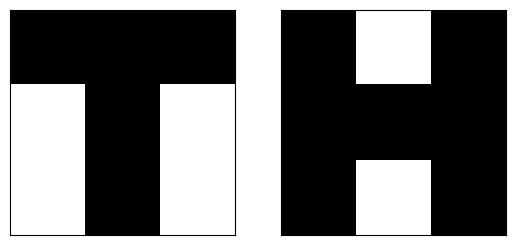

In [8]:
display_chars([T, H]);

Agora, vamos treinar um modelo sobre esses dois caracteres:

In [9]:
def flatten(char):
  return np.reshape(char, (-1,)).tolist()

In [10]:
model = wp.Wisard(3)



In [11]:
training_data = np.array([flatten(char) for char in [T, H]])
training_labels = np.array(["T", "H"])

# Criando um objeto wisardpkg.DataSet
dataset = wp.DataSet(training_data, training_labels)

# Treinando o modelo com nosso dataset
model.train(dataset)

In [12]:
training_labels


array(['T', 'H'], dtype='<U1')

Podemos testar contra os próprios exemplos de treino:

In [13]:
model.classify(wp.DataSet(training_data))



['T', 'H']

Ser capaz de classificar corretamente imagens já vistas antes, no entanto, não é muito surpreendente. Como o modelo se sai com exemplos novos?

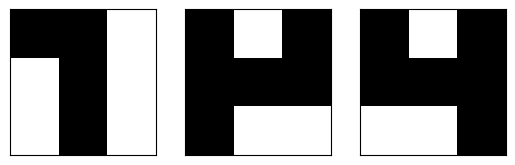

In [14]:
new_examples = [
  [
   [1, 1, 0],
   [0, 1, 0],
   [0, 1, 0]
  ],
  [
   [1, 0, 1],
   [1, 1, 1],
   [1, 0, 0]
  ],
  [
   [1, 0, 1],
   [1, 1, 1],
   [0, 0, 1]
  ]
]

display_chars(new_examples);

In [15]:
test_set = np.array([flatten(char) for char in new_examples])

model.classify(wp.DataSet(test_set))

['T', 'H', 'H']

O que exatamente o modelo aprendeu? O que reside nos neurônios RAM? Podemos ter uma ideia através das imagens mentais do modelo:

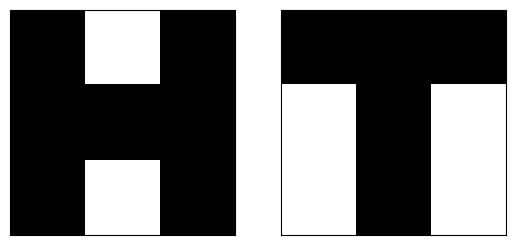

In [16]:
def inflate(char):
  return np.reshape(char, (3, 3)).tolist()

images = model.getMentalImages()

display_chars([inflate(image) for image in images.values()]);

Nesse exemplo, as imagens mentais são exatamente os exemplos de treino, pois apresentamos apenas um exemplo por classe. No entanto, em uma tarefa mais realista, teríamos múltiplos exemplos por classe, cada um com suas particularidades. Nesses cenários, as imagens são bem mais difusas e mostram que o modelo tenta assimilar as características fundamentais das classes. Isso é bem visível nas imagens mentais de um modelo treinado sobre o MNIST.

## 3. Indo além de exemplos simples

Nesse momento, os resultados demonstrados acima podem não parecer muito impressionantes. Verdadeiramente, eles não são. Distinguir imagens compostas de meros 9 pixels não é uma tarefa difícil. No entanto, redes neurais sem peso não estão de forma alguma limitadas a problemas de tão baixas dimensões. Desde sua concepção, a WiSARD foi empregada em tarefas mais complicadas. Um exemplo de maiores dimensões, e que ainda assim não representa os limites do modelo, e a classificação de dígitos do conjunto de dados MNIST. A WiSARD é capaz de alcançar altos níveis de acurácia quando treinada e avaliada com o MNIST.

In [17]:
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)
X = X.to_numpy()


In [18]:
def sample_digit(target, X=X, y=y):
    return next((digit for (digit, label) in zip(X, y) if label == str(target))).reshape((28,28))

def display_mnist_digits():
    fig, axs = plt.subplots(2, 5)

    for i in range(2):
        for j in range(5):
            axs[i, j].imshow(sample_digit(5*i + j), cmap="gray")
            axs[i, j].axes.xaxis.set_visible(False)
            axs[i, j].axes.yaxis.set_visible(False)

    return fig

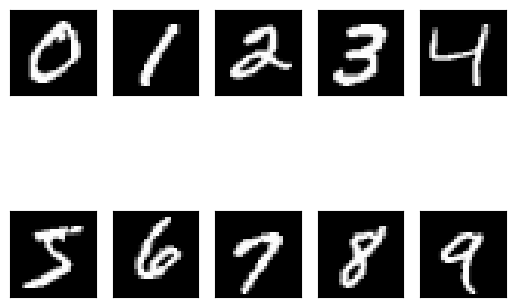

In [19]:
display_mnist_digits();

In [20]:
X[0].shape

(784,)

In [21]:
X.shape

(70000, 784)

Binarizando imagens:

In [22]:
def binarize(image, threshold):
  return np.where(image > threshold, 1, 0).tolist()


def binary_encoder(images, threshold=127):
  return [binarize(image, threshold) for image in images]

In [23]:
X_bin = binary_encoder(X)

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X_bin, y, test_size=0.2, random_state=1)
X_train_img, X_test_img, y_train_lable, y_test_lable = train_test_split(X, y, test_size=1/7, random_state=1)


Agora, vamos treinar um primeiro modelo WiSARD:

In [45]:
%%time
model = wp.Wisard(16)
ds = wp.DataSet(X_train, y_train.tolist())
model.train(ds)



CPU times: user 5.94 s, sys: 147 ms, total: 6.09 s
Wall time: 6.15 s


Vamos definir uma função para medir a acurácia:

In [46]:
def accuracy(y_pred, y_target):
  return np.where(y_pred == y_target, 1, 0).sum()/len(y_target)

In [47]:
%%time
accuracy(model.classify(wp.DataSet(X_test)), y_test)

CPU times: user 3.64 s, sys: 16 ms, total: 3.65 s
Wall time: 3.64 s


np.float64(0.8435)

In [28]:
probabilites = model.classify(wp.DataSet(X_test))


In [29]:
X_test_img = X_test_img.reshape(10000, 28, 28)

In [30]:
y_test = np.array(y_test, dtype = int)
y_test

array([6, 2, 7, ..., 0, 3, 1], shape=(10000,))

In [31]:
probabilities = np.array(probabilites, dtype = int)
probabilities

array([2, 2, 4, ..., 0, 2, 2], shape=(10000,))

##Avaliando a acurácia visualmente.

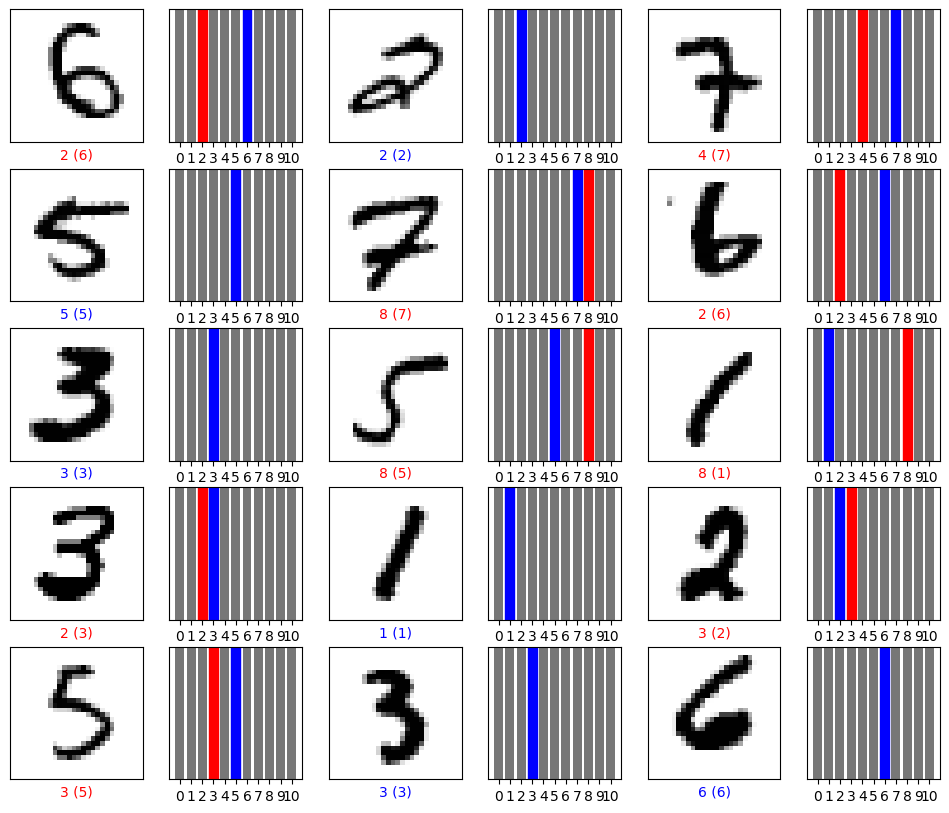

In [32]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, probabilities, y_test, X_test_img)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, probabilities, y_test)
plt.show()

Variando o tamanho de tupla:

In [33]:
ds = wp.DataSet(X_train, y_train.tolist())

In [34]:
%%time
model_2 = wp.Wisard(28)

model_2.train(ds)

accuracy(model_2.classify(wp.DataSet(X_test)), y_test)


CPU times: user 1.06 s, sys: 1.15 ms, total: 1.07 s
Wall time: 1.07 s


np.float64(0.0)

##Mostrando imagens mentais:

In [35]:
def display_digits(images):
  fig, axs = plt.subplots(2, 5, squeeze=True)

  for i, img in enumerate(images.values()):
    img = np.reshape(img, (28, 28))
    img = img/np.max(img)
    fig.axes[i].imshow(img, cmap="gray", vmin=0., vmax=1.)
    fig.axes[i].xaxis.set_visible(False)
    fig.axes[i].yaxis.set_visible(False)

  return fig

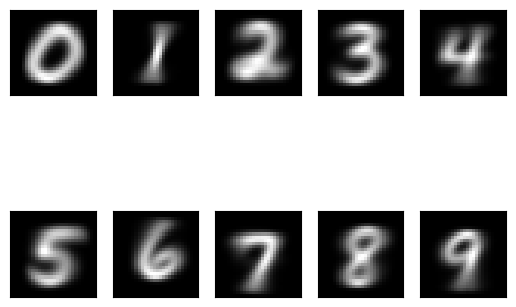

In [36]:
display_digits(model_2.getMentalImages());

##ClusWiSARD

A *ClusWisard* é uma variação do modelo *wisard* que permite ter mais de um discriminador para uma mesma classe. Ela foi criada no intuito de lidar com bases de dados em que para uma mesma classe há padrões muito discrepantes entre se. Esse tipo de situação pode levar (para um modelo *wisard* padrão), a uma rápida saturação.

Assim, é feita uma verificação onde cria-se um novo discriminador para a classe uma vez que os novos exemplares de dados analisados não são suficientemente semelhantes aos que ja foram aprendidos.

---
Quando instânciado, necessita de 4 hiperparâmetros obrigatórios: ***addressSize***, ***minScore***, ***threshold*** e ***discriminatorLimit***.
*addressSize* é o tamanho do endereço, *minScore* é o escore mínimo aceito pela *cluswisard* para criar um novo discriminador, *threshold* é o limite de exemplos que um discriminador pode aprender e *discriminatorLimit*, como o nome sugere, é o limite de discriminadores que uma classe pode ter.


In [37]:
%%time

model_clus = wp.ClusWisard(28, 0.1, 100, 5) # Modelo com 28 de memória 0.1 de minScore, 10 threshold e no maximo 5 discriminadores

model_clus.train(wp.DataSet(X_train, y_train.tolist()))

KeyboardInterrupt: 

In [ ]:
out = model_clus.classify(wp.DataSet(X_test))
accuracy(out, y_test)


np.float64(0.9242)

In [ ]:
def display_digits_clus(digits, pred, title, n):

    discriminator = digits
    image = np.reshape(discriminator, (28, 28))
    plt.imshow(image, cmap='gray')
    plt.title(f"Class: {pred}, Discriminator: {title}")
    plt.show()

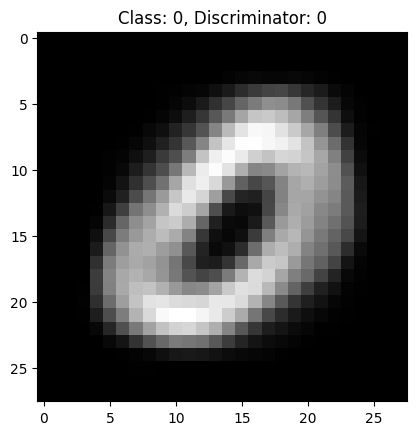

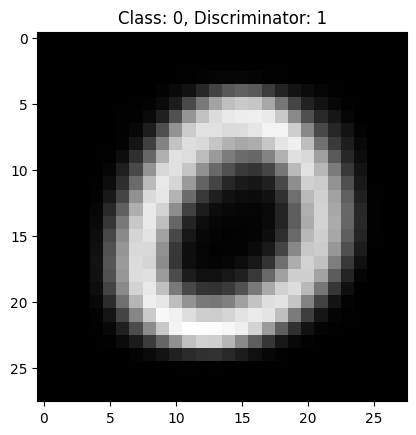

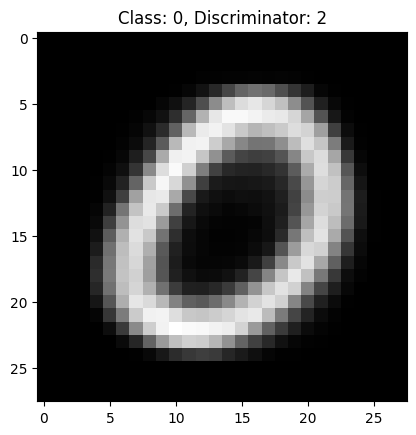

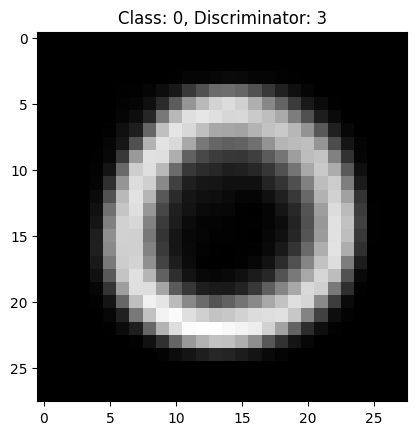

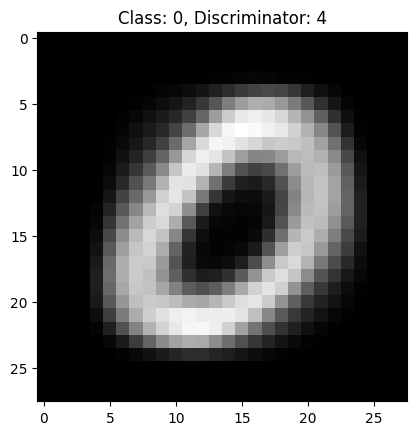

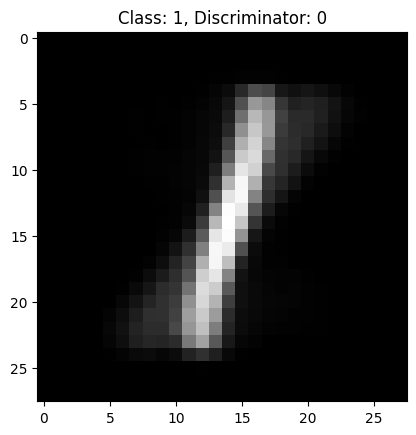

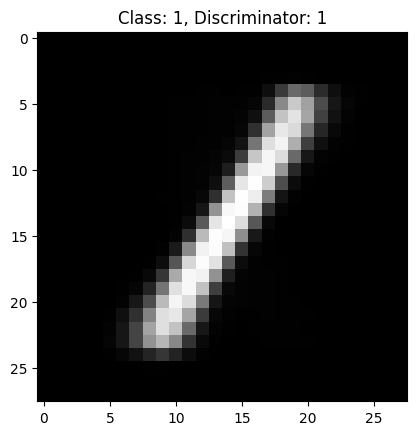

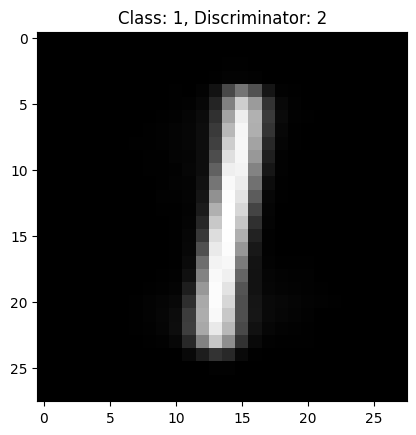

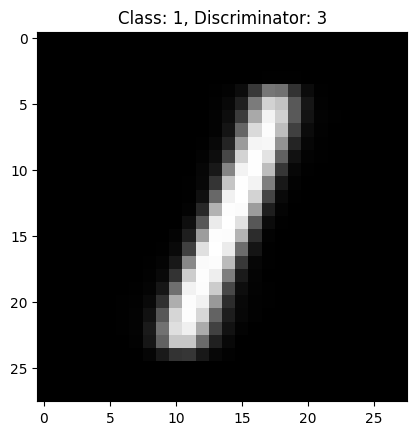

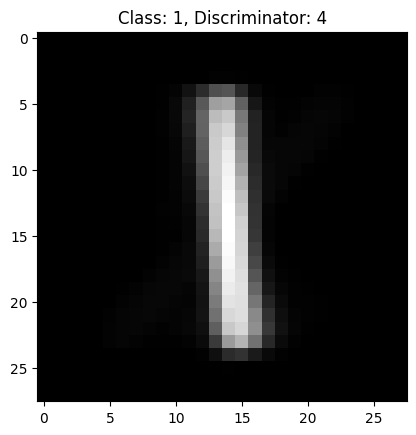

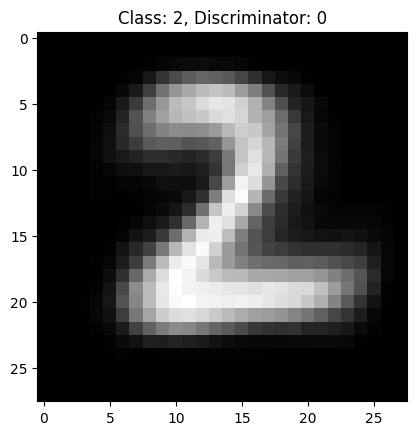

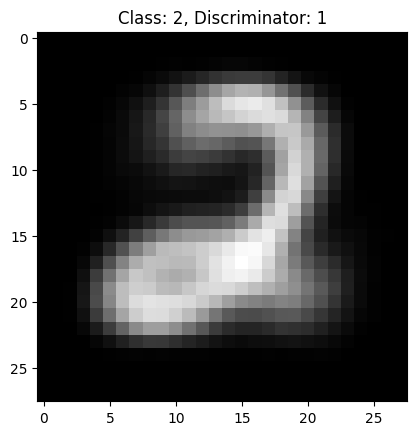

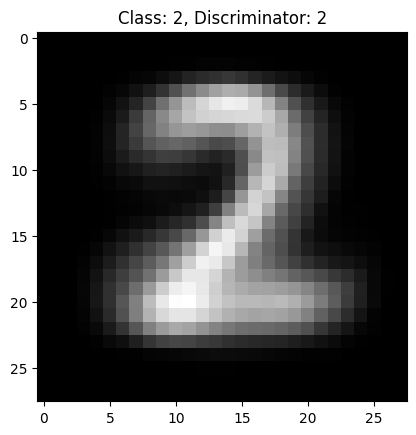

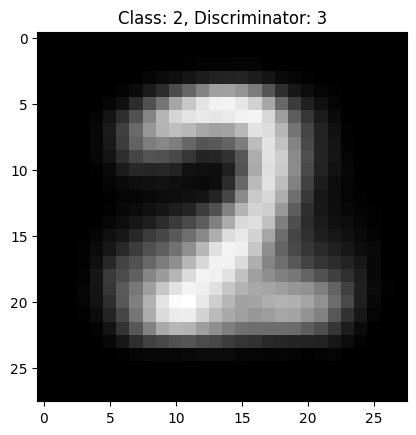

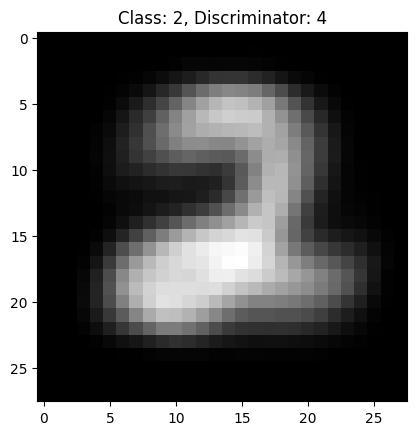

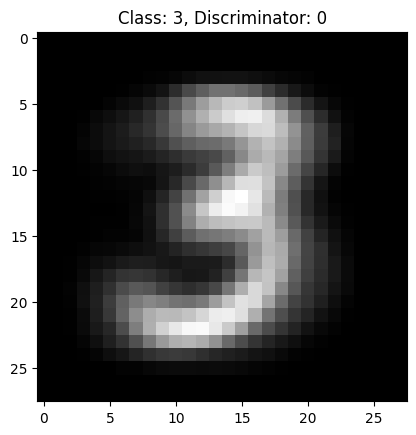

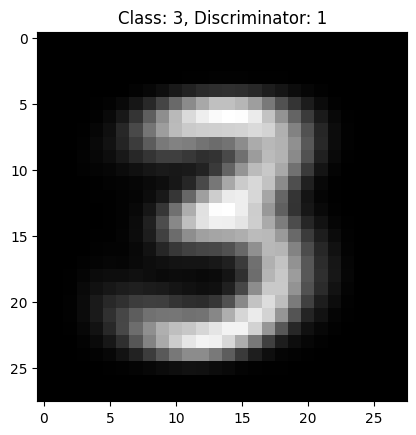

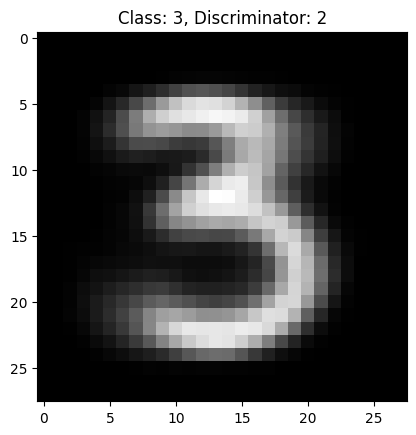

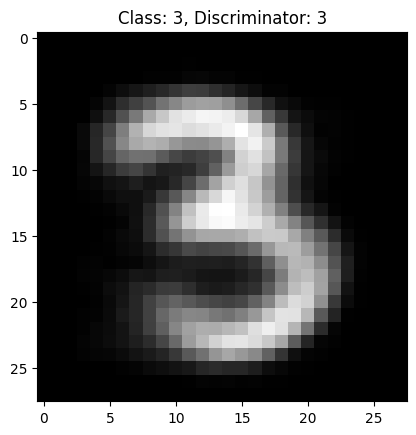

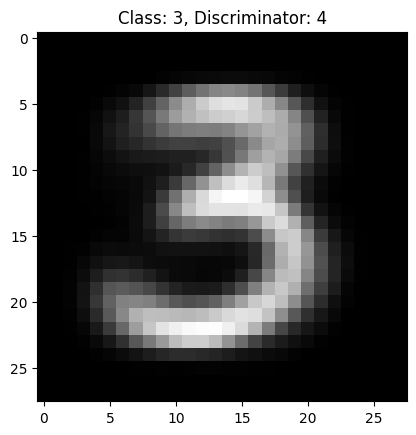

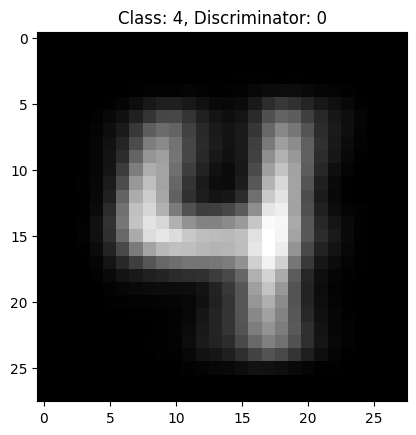

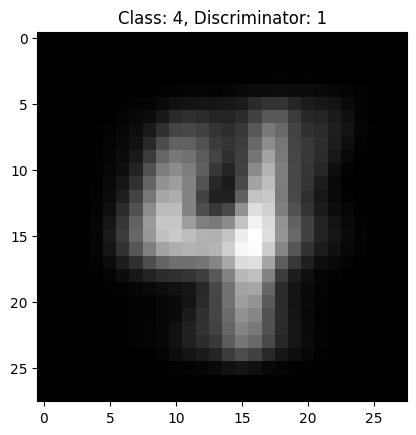

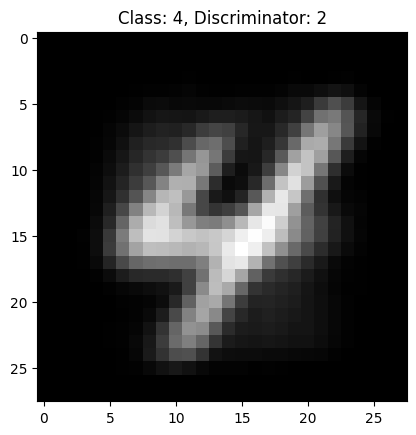

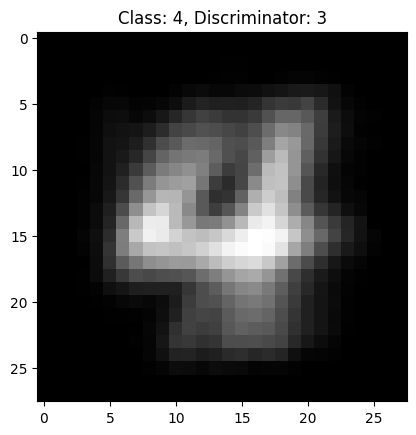

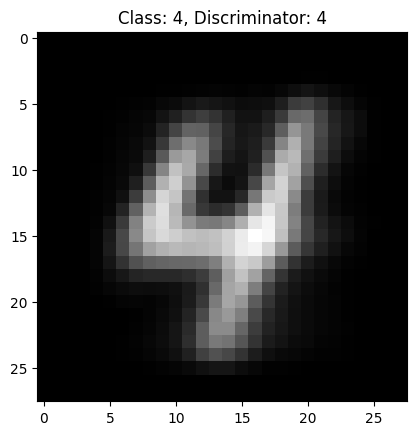

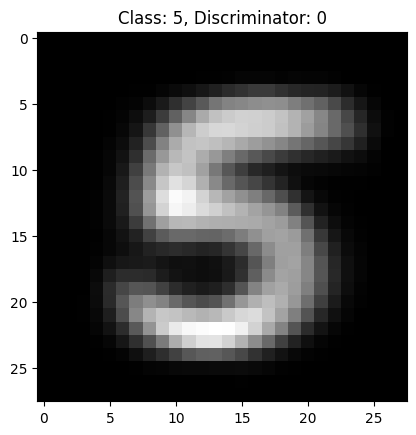

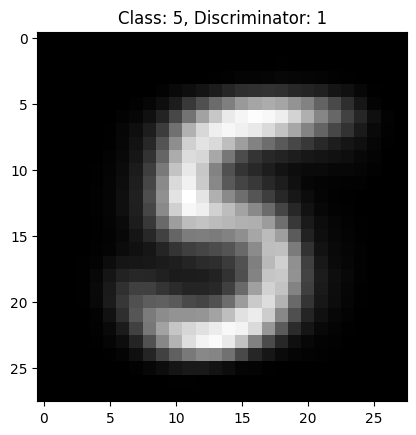

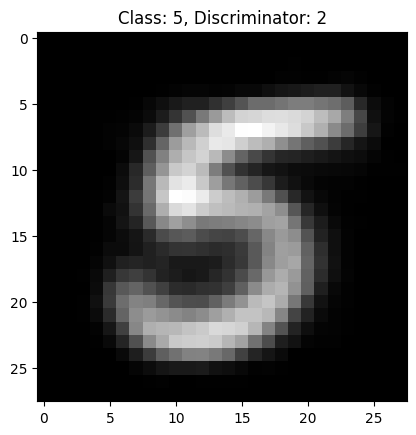

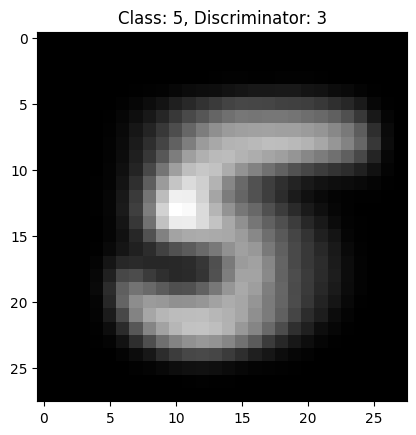

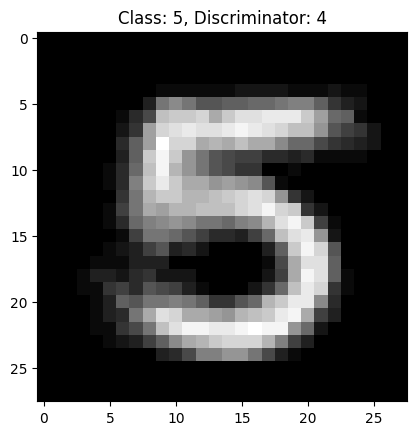

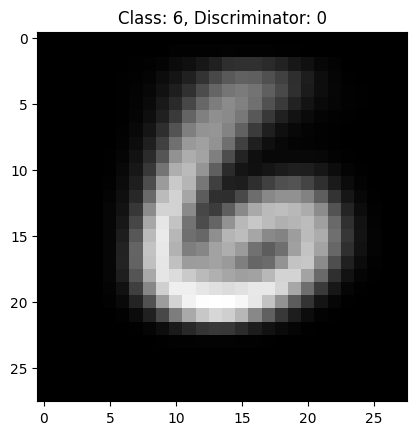

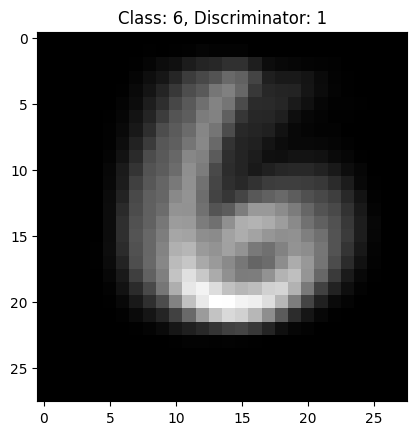

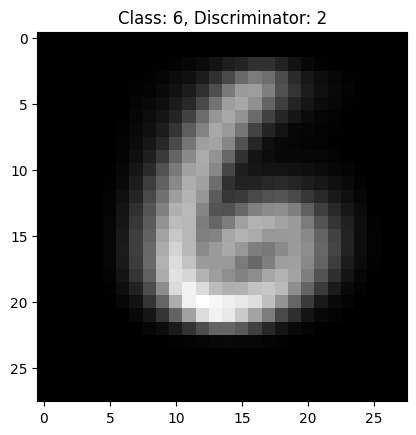

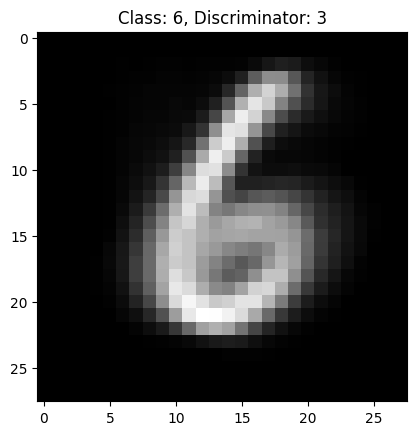

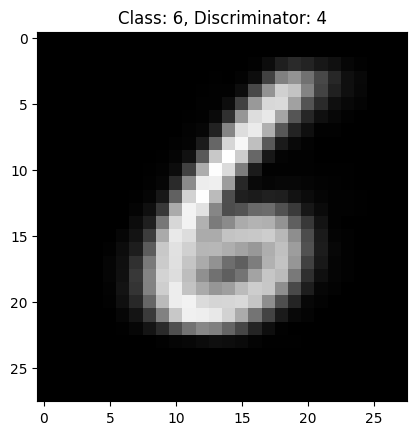

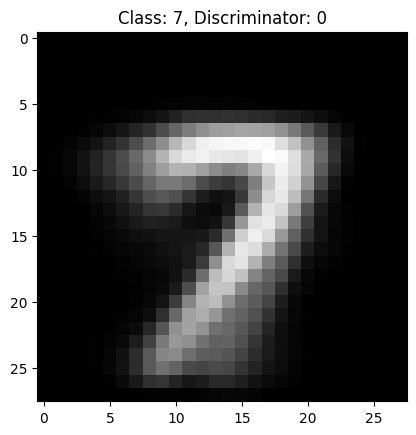

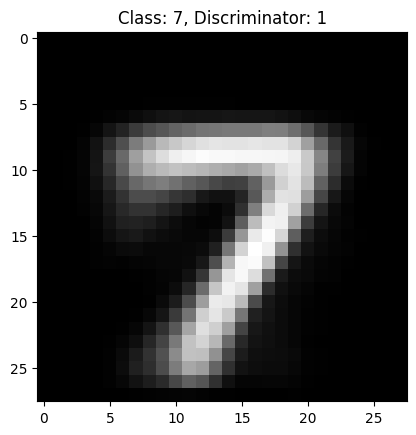

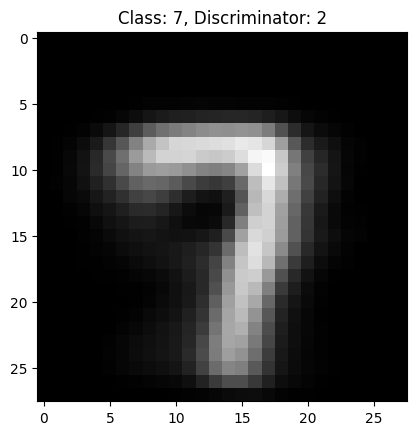

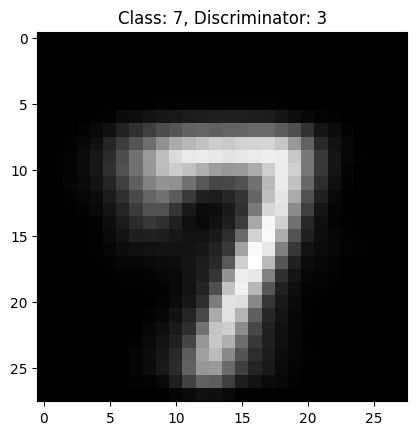

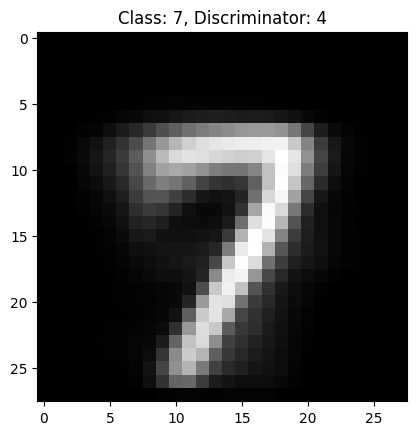

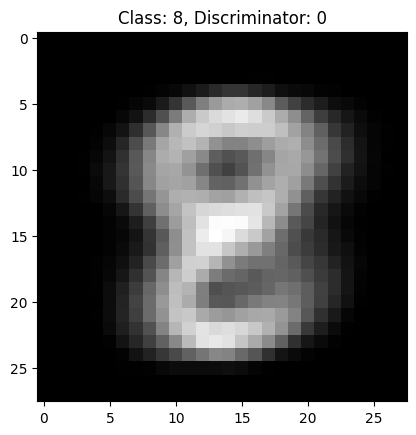

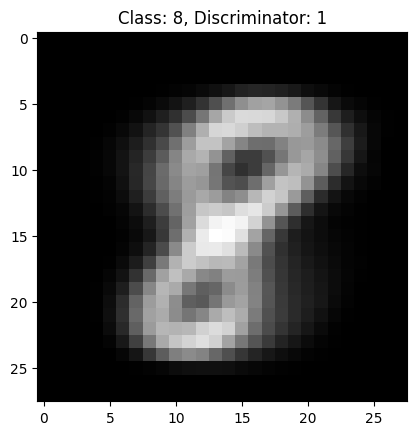

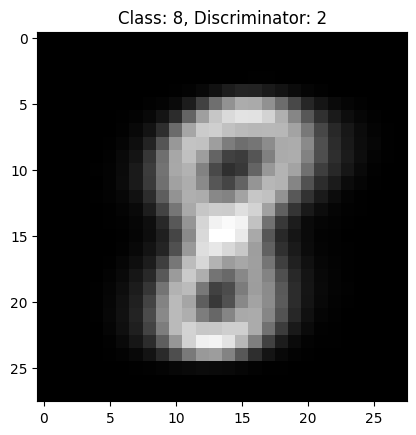

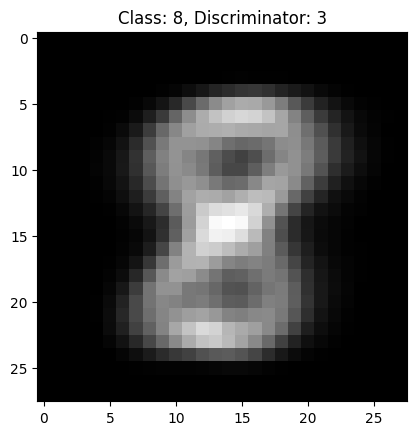

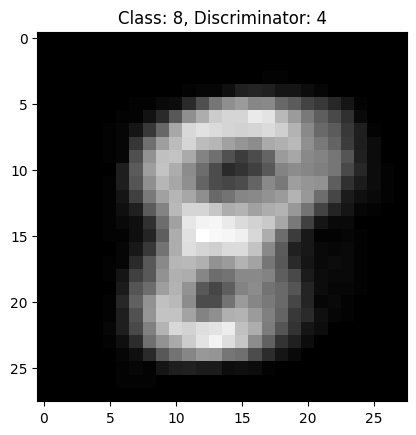

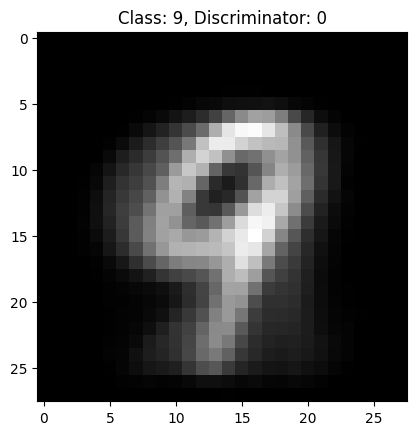

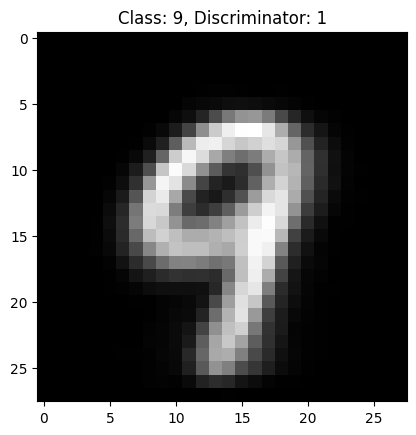

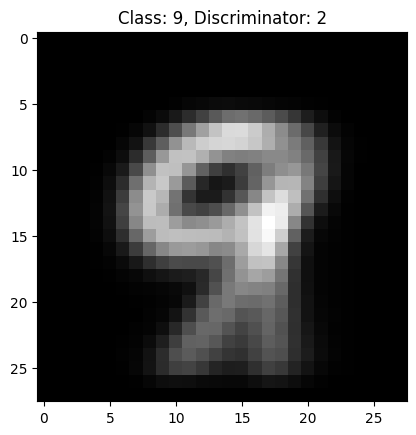

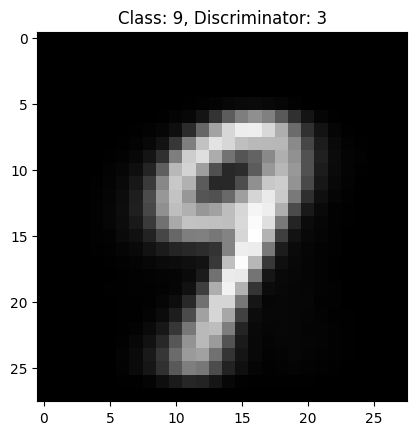

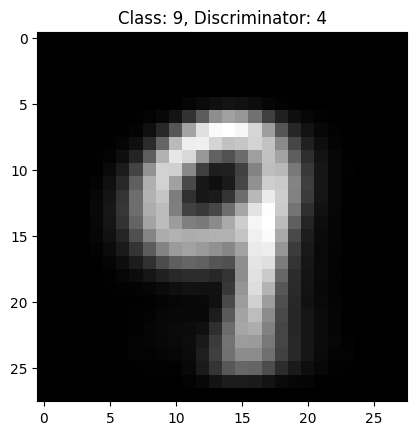

In [ ]:

patterns = model_clus.getMentalImages()

for key in patterns:
    cluster = patterns[key]
    for index,discriminator in enumerate(cluster):
        display_digits_clus(discriminator, key, index, len(patterns));


##Mostrando as imagens mentais da cluswisard.
Repare que para uma mesma classe de números criou-se  o limite de 5 discriminadores, para cada um, é perceptível a lijeira discrepância entre eles. Não somente, é possível observar inputs de padrão tão heterogênio que possuem um discriminador apenas para esse padrão!

-----

###Mas e se diminuirmos o número de discriminadores?

In [ ]:
cw_model2 = wp.ClusWisard(28, 0.1, 10, 3)

cw_model2.train(wp.DataSet(X_train, y_train.tolist()))

out = cw_model2.classify(wp.DataSet(X_test))

accuracy(out, y_test)


np.float64(0.9135)

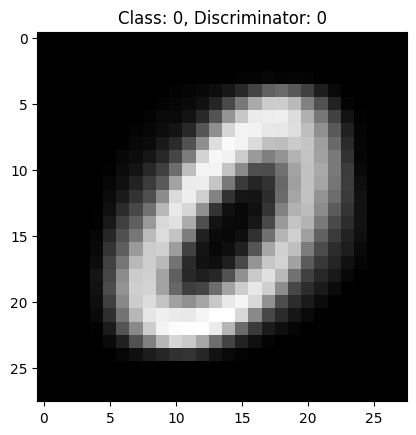

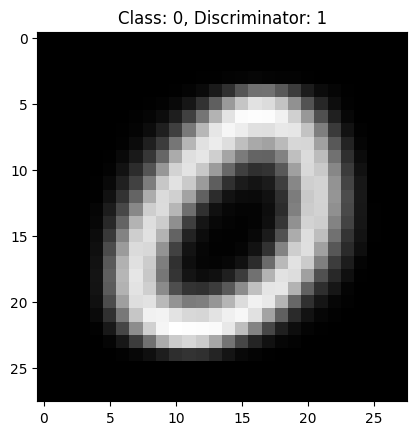

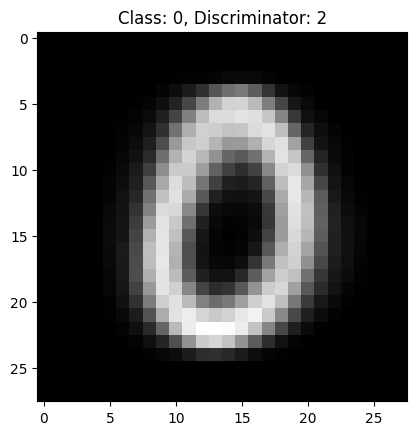

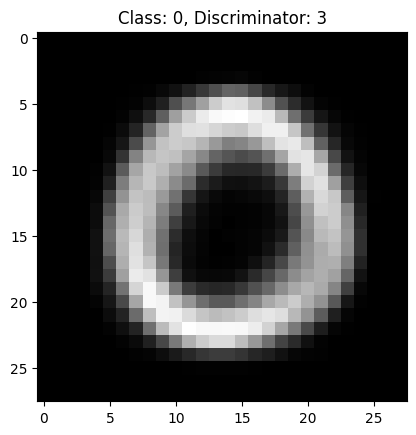

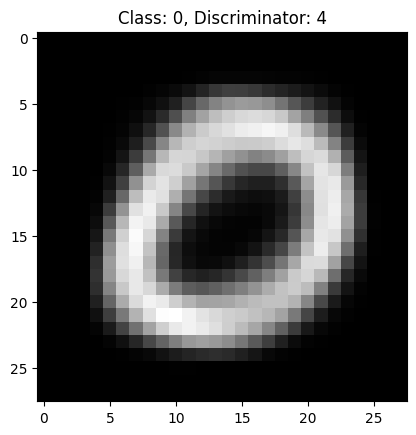

In [ ]:
patterns = cw_model2.getMentalImages()
key_iterator = iter(patterns)
key = next(key_iterator)
cluster = patterns[key]
for index,discriminator in enumerate(cluster):
  display_digits_clus(discriminator, key, index, len(patterns));